In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import my
import my.misc as misc
import my.analysis as ana
import MDAnalysis as mda
from pyrosetta import *
from pyrosetta.toolbox import *
from pyrosetta.rosetta import protocols
#init(extra_options="-run:interactive")
pyrosetta.init()

PyRosetta-4 2019 [Rosetta PyRosetta4.Release.python36.ubuntu 2019.22+release.d8f9b4a90a8f2caa32948bacdb6e551591facd5f 2019-05-30T13:47:16] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.
core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: PyRosetta4.Release.python36.ubuntu r223 2019.22+release.d8f9b4a90a8 d8f9b4a90a8f2caa32948bacdb6e551591facd5f http://www.pyrosetta.org 2019-05-30T13:47:16
core.init: command: PyRosetta -ex1 -ex2aro -database /usr/local/lib/python3.6/dist-packages/pyrosetta-2019.22+release.d8f9b4a90a8-py3.6-linux-x86_64.egg/pyrosetta/database
core.init: 'RNG device' seed mode, using '/dev/urandom', seed=-149772789 seed_offset=0 real_seed=-149772789
core.init.random: RandomGenerator:init: Normal mode, seed=-149772789 RG_type=mt19937


In [2]:
def abinitio_align_universe(decoy, ref, print_comment=False):
    """
    ref protein is smaller than decoy:
        -> shift resids and atomids of ref to match decoy.
    
    Args:
        decoy (MDA universe)
        ref (MDA universe)
        
    Returns:
        decoy (MDA atomgrp)
    """
    decoy = ana.true_select_atoms(u=decoy, sel='protein', ignh=True)
    decoy.atoms.ids = misc.norm_array(decoy.atoms.ids, start_value=decoy.atoms.ids[0])
    # get slice_indices by comparing resnames
    slice_ndx1, slice_ndx2 = misc.get_slice_indices(ref.residues.resnames, decoy.residues.resnames)
    ref.residues.resids = decoy.residues.resids[slice_ndx1:slice_ndx2]
    
    # get atom id shift by counting atoms with resid < (new) smallest ref resid
    atom_id_shift = len(np.where(decoy.atoms.resids < ref.atoms.resids[0])[0])
    ref.atoms.ids += atom_id_shift 
    
    if print_comment:
        print("The function 'abinitio_align_universe' returns a decoy atom_grp!")
        print("This does not affect the original decoy universe!")
    
    return decoy
    
def abinitio_select_RMSD_atomgrp(decoy, ref):
    """
    TODO
    """
    resmin = ref.residues.resids[0]
    resmax = ref.residues.resids[-1]
    decoy = ana.true_select_atoms(decoy, sel=f"protein and resid {resmin}-{resmax}")
    return decoy

In [3]:
ref = mda.Universe("./ref_files/2hda.ChainA.pdb")
ref

<Universe with 473 atoms>

In [5]:
decoy_start_ndx = 0
decoy_end_ndx = 3600

RMSD = []
SCORE = []
scorefxn = get_fa_scorefxn()

for i in range(decoy_start_ndx, decoy_end_ndx+1):
    decoy_path = f"./output/2hda_{i}.pdb"
    
    # get RMSD
    decoy = mda.Universe(decoy_path)
    decoy = abinitio_align_universe(decoy, ref, print_comment=False)
    decoy_RMSD_atomgrp = abinitio_select_RMSD_atomgrp(decoy, ref)
    ftr = ana.get_RMSD(decoy_RMSD_atomgrp, ref, sel='backbone')
    RMSD.append(ftr[2])
    
    # get Score
    pose = pose_from_pdb(decoy_path)
    SCORE.append(scorefxn(pose))

core.scoring.ScoreFunctionFactory: SCOREFUNCTION: ref2015
core.import_pose.import_pose: File './output/2hda_0.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_4.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_5.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_6.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_7.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_8.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './outp

core.import_pose.import_pose: File './output/2hda_75.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_76.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_77.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_78.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_79.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_80.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_81.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_82.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_83.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_84.pdb' automatically determined to be of

core.import_pose.import_pose: File './output/2hda_150.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_151.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_152.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_153.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_154.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_155.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_156.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_157.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_158.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_159.pdb' automatically determine

core.import_pose.import_pose: File './output/2hda_225.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_226.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_227.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_228.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_229.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_230.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_231.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_232.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_233.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_234.pdb' automatically determine

core.import_pose.import_pose: File './output/2hda_300.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_301.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_302.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_303.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_304.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_305.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_306.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_307.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_308.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_309.pdb' automatically determine

core.import_pose.import_pose: File './output/2hda_375.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_376.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_377.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_378.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_379.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_380.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_381.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_382.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_383.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_384.pdb' automatically determine

core.import_pose.import_pose: File './output/2hda_450.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_451.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_452.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_453.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_454.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_455.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_456.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_457.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_458.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_459.pdb' automatically determine

core.import_pose.import_pose: File './output/2hda_525.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_526.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_527.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_528.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_529.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_530.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_531.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_532.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_533.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_534.pdb' automatically determine

core.import_pose.import_pose: File './output/2hda_600.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_601.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_602.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_603.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_604.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_605.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_606.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_607.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_608.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_609.pdb' automatically determine

core.import_pose.import_pose: File './output/2hda_675.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_676.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_677.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_678.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_679.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_680.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_681.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_682.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_683.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_684.pdb' automatically determine

core.import_pose.import_pose: File './output/2hda_750.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_751.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_752.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_753.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_754.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_755.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_756.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_757.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_758.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_759.pdb' automatically determine

core.import_pose.import_pose: File './output/2hda_825.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_826.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_827.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_828.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_829.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_830.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_831.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_832.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_833.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_834.pdb' automatically determine

core.import_pose.import_pose: File './output/2hda_900.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_901.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_902.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_903.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_904.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_905.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_906.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_907.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_908.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_909.pdb' automatically determine

core.import_pose.import_pose: File './output/2hda_975.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_976.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_977.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_978.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_979.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_980.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_981.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_982.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_983.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_984.pdb' automatically determine

core.import_pose.import_pose: File './output/2hda_1050.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1051.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1052.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1053.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1054.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1055.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1056.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1057.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1058.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1059.pdb' automatically

core.import_pose.import_pose: File './output/2hda_1124.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1125.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1126.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1127.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1128.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1129.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1130.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1131.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1132.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1133.pdb' automatically

core.import_pose.import_pose: File './output/2hda_1198.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1199.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1200.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1201.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1202.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1203.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1204.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1205.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1206.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1207.pdb' automatically

core.import_pose.import_pose: File './output/2hda_1272.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1273.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1274.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1275.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1276.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1277.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1278.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1279.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1280.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1281.pdb' automatically

core.import_pose.import_pose: File './output/2hda_1346.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1347.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1348.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1349.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1350.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1351.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1352.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1353.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1354.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1355.pdb' automatically

core.import_pose.import_pose: File './output/2hda_1420.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1421.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1422.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1423.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1424.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1425.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1426.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1427.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1428.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1429.pdb' automatically

core.import_pose.import_pose: File './output/2hda_1494.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1495.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1496.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1497.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1498.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1499.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1500.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1501.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1502.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1503.pdb' automatically

core.import_pose.import_pose: File './output/2hda_1568.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1569.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1570.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1571.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1572.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1573.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1574.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1575.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1576.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1577.pdb' automatically

core.import_pose.import_pose: File './output/2hda_1642.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1643.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1644.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1645.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1646.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1647.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1648.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1649.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1650.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1651.pdb' automatically

core.import_pose.import_pose: File './output/2hda_1716.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1717.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1718.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1719.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1720.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1721.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1722.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1723.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1724.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1725.pdb' automatically

core.import_pose.import_pose: File './output/2hda_1790.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1791.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1792.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1793.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1794.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1795.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1796.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1797.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1798.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1799.pdb' automatically

core.import_pose.import_pose: File './output/2hda_1864.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1865.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1866.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1867.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1868.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1869.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1870.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1871.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1872.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1873.pdb' automatically

core.import_pose.import_pose: File './output/2hda_1938.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1939.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1940.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1941.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1942.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1943.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1944.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1945.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1946.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_1947.pdb' automatically

core.import_pose.import_pose: File './output/2hda_2012.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2013.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2014.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2015.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2016.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2017.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2018.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2019.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2020.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2021.pdb' automatically

core.import_pose.import_pose: File './output/2hda_2086.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2087.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2088.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2089.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2090.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2091.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2092.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2093.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2094.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2095.pdb' automatically

core.import_pose.import_pose: File './output/2hda_2160.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2161.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2162.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2163.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2164.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2165.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2166.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2167.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2168.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2169.pdb' automatically

core.import_pose.import_pose: File './output/2hda_2234.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2235.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2236.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2237.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2238.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2239.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2240.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2241.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2242.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2243.pdb' automatically

core.import_pose.import_pose: File './output/2hda_2308.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2309.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2310.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2311.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2312.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2313.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2314.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2315.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2316.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2317.pdb' automatically

core.import_pose.import_pose: File './output/2hda_2382.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2383.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2384.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2385.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2386.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2387.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2388.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2389.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2390.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2391.pdb' automatically

core.import_pose.import_pose: File './output/2hda_2456.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2457.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2458.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2459.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2460.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2461.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2462.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2463.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2464.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2465.pdb' automatically

core.import_pose.import_pose: File './output/2hda_2530.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2531.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2532.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2533.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2534.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2535.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2536.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2537.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2538.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2539.pdb' automatically

core.import_pose.import_pose: File './output/2hda_2604.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2605.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2606.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2607.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2608.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2609.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2610.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2611.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2612.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2613.pdb' automatically

core.import_pose.import_pose: File './output/2hda_2678.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2679.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2680.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2681.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2682.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2683.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2684.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2685.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2686.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2687.pdb' automatically

core.import_pose.import_pose: File './output/2hda_2752.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2753.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2754.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2755.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2756.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2757.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2758.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2759.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2760.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2761.pdb' automatically

core.import_pose.import_pose: File './output/2hda_2826.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2827.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2828.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2829.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2830.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2831.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2832.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2833.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2834.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2835.pdb' automatically

core.import_pose.import_pose: File './output/2hda_2900.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2901.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2902.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2903.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2904.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2905.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2906.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2907.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2908.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2909.pdb' automatically

core.import_pose.import_pose: File './output/2hda_2974.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2975.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2976.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2977.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2978.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2979.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2980.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2981.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2982.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_2983.pdb' automatically

core.import_pose.import_pose: File './output/2hda_3048.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3049.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3050.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3051.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3052.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3053.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3054.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3055.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3056.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3057.pdb' automatically

core.import_pose.import_pose: File './output/2hda_3122.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3123.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3124.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3125.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3126.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3127.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3128.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3129.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3130.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3131.pdb' automatically

core.import_pose.import_pose: File './output/2hda_3196.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3197.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3198.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3199.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3200.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3201.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3202.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3203.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3204.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3205.pdb' automatically

core.import_pose.import_pose: File './output/2hda_3270.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3271.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3272.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3273.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3274.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3275.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3276.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3277.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3278.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3279.pdb' automatically

core.import_pose.import_pose: File './output/2hda_3344.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3345.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3346.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3347.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3348.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3349.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3350.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3351.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3352.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3353.pdb' automatically

core.import_pose.import_pose: File './output/2hda_3418.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3419.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3420.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3421.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3422.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3423.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3424.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3425.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3426.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3427.pdb' automatically

core.import_pose.import_pose: File './output/2hda_3492.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3493.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3494.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3495.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3496.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3497.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3498.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3499.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3500.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3501.pdb' automatically

core.import_pose.import_pose: File './output/2hda_3566.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3567.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3568.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3569.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3570.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3571.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3572.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3573.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3574.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File './output/2hda_3575.pdb' automatically

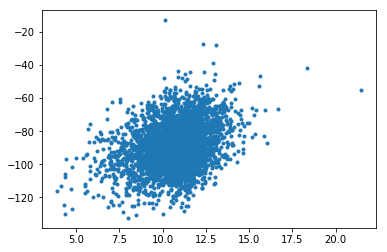

In [6]:
plt.plot(RMSD, SCORE, ".")

In [7]:
misc.get_ranked_array(SCORE)[0][::-1]

array([-132.38564554, -130.66123424, -130.03696566, ...,  -28.06310663,
        -27.33714002,  -12.96335203])

In [8]:
misc.get_ranked_array(SCORE)[1][::-1]

array([1813, 3177, 2104, ..., 1307, 2353, 2575])